# Vienna data cube
TODO Link to metadata (source data, a/p metadata)

### Prerequisites
Before running the notebook install the necessary packages with `pip`

In [ ]:
# !pip install xarray, rioxarray, s3fs, pandas

In [1]:
import s3fs
import xarray as xr
import rioxarray as rxr
from configparser import ConfigParser
import os
s3fs_FS = s3fs.S3FileSystem(
    key=os.environ.get('S3_USER_STORAGE_KEY'),
    secret=os.environ.get('S3_USER_STORAGE_SECRET'),
)


### List datasets

In [2]:
# List all files in the folder
files = s3fs_FS.ls('s3:///hub-fairicubeuc1-training/UC1_training')

# Print the list of files
for file in files:
    print(file)

hub-fairicubeuc1-training/UC1_training/
hub-fairicubeuc1-training/UC1_training/.ipynb_checkpoints
hub-fairicubeuc1-training/UC1_training/lookup_tables
hub-fairicubeuc1-training/UC1_training/r01_real_land_use2020_100m_b32_1_1.tif
hub-fairicubeuc1-training/UC1_training/r02_dem_mean_100m.tif
hub-fairicubeuc1-training/UC1_training/r04_imp2018_100m_b1_1_1.tif
hub-fairicubeuc1-training/UC1_training/r05_treecover2018_indicator0100.tif
hub-fairicubeuc1-training/UC1_training/r09_Wien_build_volume_i_grid100m.tif


In [29]:
# load one dataset as xarray DataArray
da = rxr.open_rasterio(s3fs_FS.open('s3://hub-fairicubeuc1-training/UC1_training/r04_imp2018_100m_b1_1_1.tif'))
da

<xarray.DataArray (band: 1, y: 230, x: 300)>
[69000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.115e+04 -1.105e+04 ... 1.865e+04 1.875e+04
  * y            (y) float64 3.54e+05 3.538e+05 3.538e+05 ... 3.312e+05 3.31e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

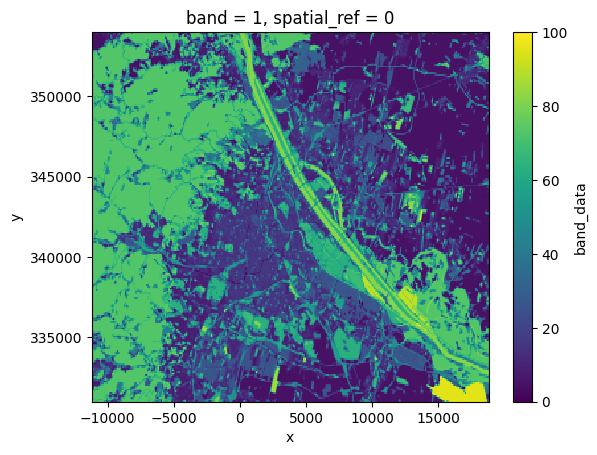

In [27]:
# alternatively, when working in the FAIRiCUBE Hub Workspace, datasets are available in the filesystem
da = xr.open_dataset(f'{home}/s3/UC1_training/r04_imp2018_100m_b1_1_1.tif')
da.sel(band=1).band_data.plot()

### Thematic spatial cube
Merge DataArrays in one DataSet

In [9]:
# land use
da = rxr.open_rasterio(s3fs_FS.open('s3://hub-fairicubeuc1-training/UC1_training/r01_real_land_use2020_100m_b32_1_1.tif'))
# convert bands into data variables
ds_landuse = xr.merge([da[band].to_dataset(name=f'land_use{band+1}') for band in range(0,32)], compat='override')
ds_landuse

<xarray.Dataset>
Dimensions:      (x: 300, y: 230)
Coordinates:
    band         int64 1
  * x            (x) float64 -1.115e+04 -1.105e+04 ... 1.865e+04 1.875e+04
  * y            (y) float64 3.54e+05 3.538e+05 3.538e+05 ... 3.312e+05 3.31e+05
    spatial_ref  int64 0
Data variables: (12/32)
    land_use1    (y, x) float32 ...
    land_use2    (y, x) float32 ...
    land_use3    (y, x) float32 ...
    land_use4    (y, x) float32 ...
    land_use5    (y, x) float32 ...
    land_use6    (y, x) float32 ...
    ...           ...
    land_use27   (y, x) float32 ...
    land_use28   (y, x) float32 ...
    land_use29   (y, x) float32 ...
    land_use30   (y, x) float32 ...
    land_use31   (y, x) float32 ...
    land_use32   (y, x) float32 ...

### Rename data variable names

In [8]:
import pandas as pd
# read LookUpTable (lut)
lut_land_use = pd.read_csv(s3fs_FS.open('s3://hub-fairicubeuc1-training/UC1_training/lookup_tables/lut_landuse.csv'))
lut_land_use

,NUTZUNG_CODE,NUTZUNG_TEXT,NUTZUNG_L0,NUTZUNG_L1,FLY_indiciator
0,1,Baulandnutzung,Wohn- u. Mischnutzung (Schwerpunkt Wohnen),locker bebautes Wohn(misch)gebiet,2
1,2,Baulandnutzung,Wohn- u. Mischnutzung (Schwerpunkt Wohnen),Wohn(misch)gebiet mittlerer Dichte,1
2,3,Baulandnutzung,Wohn- u. Mischnutzung (Schwerpunkt Wohnen),dichtes Wohn(misch)gebiet,1
3,4,Baulandnutzung,Wohn- u. Mischnutzung (Schwerpunkt Wohnen),"grossvolumiger, solidaerer Wohn(misch)bau",1
4,5,Baulandnutzung,"Geschaefts,- Kern- und Mischnutzung (Schwerpun...",Buero- und Verwaltungsviertel,1
5,6,Baulandnutzung,"Geschaefts,- Kern- und Mischnutzung (Schwerpun...",solitaere Handelsstrukturen,1
6,7,Baulandnutzung,"Geschaefts,- Kern- und Mischnutzung (Schwerpun...","Geschaefts-, Kern- u. Mischgebiete",1
7,8,Baulandnutzung,"Geschaefts,- Kern- und Mischnutzung (Schwerpun...",Mischnutzung wenig dicht,1
8,9,Baulandnutzung,Industrie- und Gewerbenutzung,"Industrie, prod. Gewerbe, Grosshandel inkl. Lager",0
9,10,Baulandnutzung,soziale Infrastruktur,"Kultur, Freizeit, Messe",1


In [10]:
#update Data variables:
# List variables
variable_list = list(ds_landuse.keys()) 
for variable_in_list in variable_list:

    # print (variable_in_list)
    band_numer = int(variable_in_list.split("land_use",1)[1])
    # print ((band_numer))
    # set the index to be the names column
    
    result_row=lut_land_use[lut_land_use['NUTZUNG_CODE'] == band_numer]#.reset_index
    cell_value = result_row['NUTZUNG_L1'].values[0]
    ds_landuse=ds_landuse.rename(name_dict={variable_in_list:cell_value})
ds_landuse

<xarray.Dataset>
Dimensions:                                            (x: 300, y: 230)
Coordinates:
    band                                               int64 1
  * x                                                  (x) float64 -1.115e+04...
  * y                                                  (y) float64 3.54e+05 ....
    spatial_ref                                        int64 0
Data variables: (12/32)
    locker bebautes Wohn(misch)gebiet                  (y, x) float32 ...
    Wohn(misch)gebiet mittlerer Dichte                 (y, x) float32 ...
    dichtes Wohn(misch)gebiet                          (y, x) float32 ...
    grossvolumiger, solidaerer Wohn(misch)bau          (y, x) float32 ...
    Buero- und Verwaltungsviertel                      (y, x) float32 ...
    solitaere Handelsstrukturen                        (y, x) float32 ...
    ...                                                 ...
    Acker                                              (y, x) float32 ...
    Weingarten                                         (y, x) float32 ...
    Gaertnerei, Obstplantagen                          (y, x) float32 ...
    Wald                                               (y, x) float32 ...
    Wiese                                              (y, x) float32 ...
    Gewaeser inkl. Bachbett                            (y, x) float32 ...

Map the land use "Park, Gruenanlage"

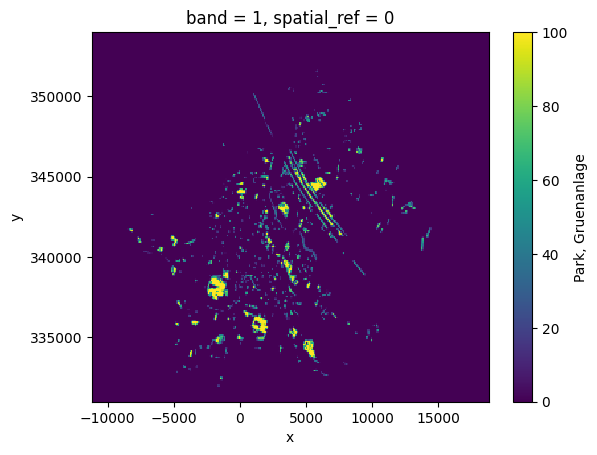

In [11]:
green_area = ds_landuse.get("Park, Gruenanlage")

#green_area_sum_area = green_area.sum()
green_area.plot()

What is the total area?

In [196]:
#print(green_area.sum(dim=['x','y']))
print ("total area [ha]")
print(green_area.values.sum() /100)

total area [ha]
1228.07


### Load next dimension

In [197]:
# digital elevation model
da = rxr.open_rasterio(s3fs_FS.open('s3://fairicube/vienna_data/100m/r02_dem/r02_dem_mean_100m_b1_1_1.tif'))
ds_dem = da.drop_vars('band').squeeze().to_dataset(name='dem')
ds_dem

<xarray.Dataset>
Dimensions:      (x: 300, y: 230)
Coordinates:
  * x            (x) float64 -1.115e+04 -1.105e+04 ... 1.865e+04 1.875e+04
  * y            (y) float64 3.54e+05 3.538e+05 3.538e+05 ... 3.312e+05 3.31e+05
    spatial_ref  int32 0
Data variables:
    dem          (y, x) float32 ...

In [198]:
# merge into one cube
cube = xr.merge([ds_landuse, ds_dem])
cube

<xarray.Dataset>
Dimensions:                                            (x: 300, y: 230)
Coordinates:
    band                                               int32 1
  * x                                                  (x) float64 -1.115e+04...
  * y                                                  (y) float64 3.54e+05 ....
    spatial_ref                                        int32 0
Data variables: (12/33)
    locker bebautes Wohn(misch)gebiet                  (y, x) float32 ...
    Wohn(misch)gebiet mittlerer Dichte                 (y, x) float32 ...
    dichtes Wohn(misch)gebiet                          (y, x) float32 ...
    grossvolumiger, solidaerer Wohn(misch)bau          (y, x) float32 ...
    Buero- und Verwaltungsviertel                      (y, x) float32 ...
    solitaere Handelsstrukturen                        (y, x) float32 ...
    ...                                                 ...
    Weingarten                                         (y, x) float32 ...
    Gaertnerei, Obstplantagen                          (y, x) float32 ...
    Wald                                               (y, x) float32 ...
    Wiese                                              (y, x) float32 ...
    Gewaeser inkl. Bachbett                            (y, x) float32 ...
    dem                                                (y, x) float32 ...

## Explore the cube
### Spatiotemporal cube

In [ ]:
# spatiotemporal cube - max daily 2m temperature
s3map = s3fs.S3Map(root='s3:///fairicube/vienna_data/100m/TN_2020-01-01_2024-05-01_epsg31256_100m_regridded.zarr', s3=s3fs_FS)
ds = xr.open_zarr(store=s3map)

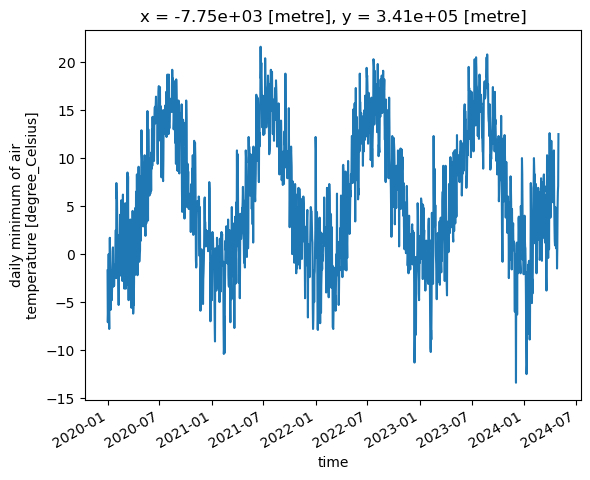

In [199]:
# spatiotemporal cube (2m max temperature)
# time series of one location
ds.TN.sel(x=-7700, y=341000, method='ffill').plot()

### Thematic spatial cube

#### Get values at location

In [150]:
# get all values at a single location, and convert to dataframe
cube.sel(x=-7700, y=341000, method='ffill').expand_dims('band').to_dataframe()

,x,y,spatial_ref,locker bebautes Wohn(misch)gebiet,Wohn(misch)gebiet mittlerer Dichte,dichtes Wohn(misch)gebiet,"grossvolumiger, solidaerer Wohn(misch)bau",Buero- und Verwaltungsviertel,solitaere Handelsstrukturen,"Geschaefts-, Kern- u. Mischgebiete",...,"Park, Gruenanlage","Sport und Bad (Outdoor), Camping",Friedhof,Acker,Weingarten,"Gaertnerei, Obstplantagen",Wald,Wiese,Gewaeser inkl. Bachbett,dem
band,,,,,,,,,,,,,,,,,,,,,
1,-7750.0,341050.0,0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,225.316086


In [274]:
# get all values at multiple locations, and convert to dataframe
x_coords = xr.DataArray([-950, 18550])
y_coords = xr.DataArray([341000, 331250])
cube.sel(x=x_coords, y=y_coords, method='ffill').expand_dims('band').to_dataframe()

x         y  spatial_ref  locker bebautes Wohn(misch)gebiet  \
band dim_0                                                                      
1    0       -950.0  341050.0            0                                0.0   
     1      18550.0  331250.0            0                                0.0   

            Wohn(misch)gebiet mittlerer Dichte  dichtes Wohn(misch)gebiet  \
band dim_0                                                                  
1    0                                     0.0                       56.0   
     1                                     0.0                        0.0   

            grossvolumiger, solidaerer Wohn(misch)bau  \
band dim_0                                              
1    0                                            0.0   
     1                                            0.0   

            Buero- und Verwaltungsviertel  solitaere Handelsstrukturen  \
band dim_0                                                               
1    0                                0.0                          0.0   
     1                                0.0                          0.0   

            Geschaefts-, Kern- u. Mischgebiete  ...  Park, Gruenanlage  \
band dim_0                                      ...                      
1    0                                     0.0  ...                0.0   
     1                                     0.0  ...                0.0   

            Sport und Bad (Outdoor), Camping  Friedhof  Acker  Weingarten  \
band dim_0                                                                  
1    0                                   0.0       0.0    0.0         0.0   
     1                                   0.0       0.0    0.0         0.0   

            Gaertnerei, Obstplantagen  Wald  Wiese  Gewaeser inkl. Bachbett  \
band dim_0                                                                    
1    0                            0.0   0.0    0.0                      0.0   
     1                            0.0   0.0    0.0                      0.0   

                   dem  
band dim_0              
1    0      228.502029  
     1      180.479736  

[2 rows x 36 columns]

In [275]:
# same with st cube: get time series at given locations
ds.TN.sel(x=x_coords, y=y_coords, method='ffill')

<xarray.DataArray 'TN' (time: 1583, dim_0: 2)>
dask.array<transpose, shape=(1583, 2), dtype=float64, chunksize=(198, 2), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2024-05-01
    x        (dim_0) float64 -950.0 1.855e+04
    y        (dim_0) float64 3.41e+05 3.312e+05
Dimensions without coordinates: dim_0
Attributes:
    cell_method:     time: minimum (19:00 CET day-1 to 19:00 CET)
    description:     daily minimum (derived from daily minima measured betwee...
    esri_pe_string:  PROJCS["ETRS89 / Austria Lambert",GEOGCS["ETRS89",DATUM[...
    grid_mapping:    lambert_conformal_conic
    long_name:       daily minimum of air temperature
    standard_name:   surface_temperature
    units:           degree_Celsius

In [285]:
# get values in a neighborhood (window) of a given location
x = -950.0
y = 341050.0
step = 100
cube.sel(x=slice(x-(step*2),x+(step*2)),y=slice(y+(step*2),y-(step*2))) #note the +-

<xarray.Dataset>
Dimensions:                                            (x: 5, y: 5)
Coordinates:
    band                                               int32 1
  * x                                                  (x) float64 -1.15e+03 ...
  * y                                                  (y) float64 3.412e+05 ...
    spatial_ref                                        int32 0
Data variables: (12/33)
    locker bebautes Wohn(misch)gebiet                  (y, x) float32 ...
    Wohn(misch)gebiet mittlerer Dichte                 (y, x) float32 ...
    dichtes Wohn(misch)gebiet                          (y, x) float32 ...
    grossvolumiger, solidaerer Wohn(misch)bau          (y, x) float32 ...
    Buero- und Verwaltungsviertel                      (y, x) float32 ...
    solitaere Handelsstrukturen                        (y, x) float32 ...
    ...                                                 ...
    Weingarten                                         (y, x) float32 0.0 ......
    Gaertnerei, Obstplantagen                          (y, x) float32 ...
    Wald                                               (y, x) float32 ...
    Wiese                                              (y, x) float32 ...
    Gewaeser inkl. Bachbett                            (y, x) float32 ...
    dem                                                (y, x) float32 220.8 ....

#### Compute statistics
Example: calculate average height of vineyards 

In [259]:
# get AVG DEM -hight of urban green:

# Step 1 Extract the variables:
dem = cube['dem']
print (dem.values.max())
Weingarten = cube['Weingarten']
print (Weingarten.values.max())


# Step 2:Mask the dem values using Weingarten
#masked_dem = cube.where(cube.dem >0 &  cube.Weingarten >0 )

masked_dem= cube.where((cube['dem'] > 0) & (cube['Weingarten'] > 0))

#masked_dem = dem.where((cube['dem'] > 0) & (cube['Weingarten'] > 0))
#masked_dem
# Step 3:Calculate the average:
average_dem = masked_dem['dem'].mean().values
#average_dem
print(f"Average height of vineyards: {average_dem}")


552.3955
100.0
Average height of vineyards: 257.7628173828125


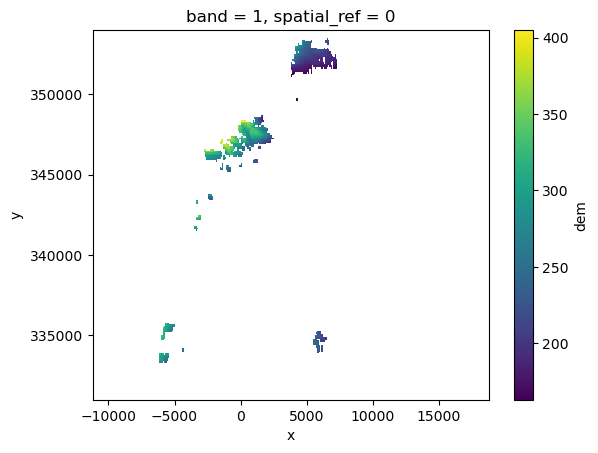

In [251]:
masked_dem['dem'].plot()

## Merge spatiotemporal and thematic data cubes